<a href="https://colab.research.google.com/github/Haamid219/NIDS/blob/main/NIDS_model_trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [22]:
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Remove leading/trailing spaces

    FEATURE_COLUMNS = [
    'Flow Duration',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Packet Length Mean',
    'Packet Length Std',
    'Total Fwd Packets',
    'Total Backward Packets',
    'SYN Flag Count',
    'FIN Flag Count',
    'RST Flag Count',
    'ACK Flag Count',
    'Average Packet Size'
    ]
    LABEL_COLUMN = 'Label'

    # Select only the required features and the label
    data = data[FEATURE_COLUMNS + [LABEL_COLUMN]]

    # Replace inf values with NaN
    data.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with NaN values (which include original NaNs and converted inf values)
    data.dropna(inplace=True)

    # Encode the labels
    label_encoder = LabelEncoder()
    data[LABEL_COLUMN] = label_encoder.fit_transform(data[LABEL_COLUMN])

    # Scale the features
    scaler = StandardScaler()
    data[FEATURE_COLUMNS] = scaler.fit_transform(data[FEATURE_COLUMNS])

    return data

In [23]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length, :-1])
        labels.append(data[i + seq_length, -1])
    return np.array(sequences), np.array(labels)

In [24]:
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [25]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred.flatten()) * 100

In [26]:
def train_and_evaluate(file_paths, seq_length=10, epochs=5, batch_size=32):
    for file_path in file_paths:
        data = load_and_preprocess_data(file_path)
        sequences, labels = create_sequences(data.values, seq_length)
        X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)
        model = build_model(input_shape=(X_train.shape[1], X_train.shape[2]))
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
        loss, accuracy = model.evaluate(X_test, y_test)
        print(f'Test Accuracy for {file_path}: {accuracy:.4f}')
        predictions = model.predict(X_test)
        predicted_classes = (predictions > 0.5).astype(int)
        accuracy_percentage = check_accuracy(y_test, predicted_classes)
        print(f'Accuracy Percentage for {file_path}: {accuracy_percentage:.2f}%')

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Model Accuracy for {file_path}')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Model Loss for {file_path}')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()
    return model

In [27]:
file_paths = [
    '/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    '/content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    '/content/Friday-WorkingHours-Morning.pcap_ISCX.csv',
    '/content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    '/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
]

In [28]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.9748 - loss: 0.0746 - val_accuracy: 0.9985 - val_loss: 0.0079
Epoch 2/5
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 46s 11ms/step - accuracy: 0.9988 - loss: 0.0064 - val_accuracy: 0.9988 - val_loss: 0.0064
Epoch 3/5
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.9991 - loss: 0.0049 - val_accuracy: 0.9992 - val_loss: 0.0042
Epoch 4/5
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 86s 11ms/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.9990 - val_loss: 0.0043
Epoch 5/5
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 78s 10ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9993 - val_loss: 0.0039
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9995 - loss: 0.0031
Test Accuracy for /content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: 0.9994
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Accuracy Percentage for /content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: 99.94%


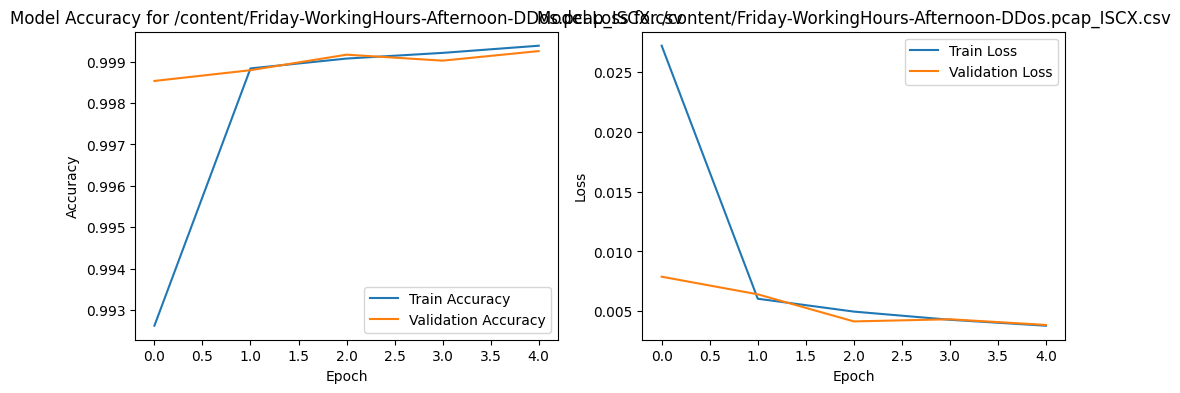

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 74s 12ms/step - accuracy: 0.9825 - loss: 0.0823 - val_accuracy: 0.9901 - val_loss: 0.0492
Epoch 2/5
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.9889 - loss: 0.0583 - val_accuracy: 0.9901 - val_loss: 0.0483
Epoch 3/5
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 83s 13ms/step - accuracy: 0.9893 - loss: 0.0563 - val_accuracy: 0.9904 - val_loss: 0.0477
Epoch 4/5
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 79s 12ms/step - accuracy: 0.9894 - loss: 0.0554 - val_accuracy: 0.9904 - val_loss: 0.0469
Epoch 5/5
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 68s 12ms/step - accuracy: 0.9894 - loss: 0.0552 - val_accuracy: 0.9904 - val_loss: 0.0466
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9888 - loss: 0.0536
Test Accuracy for /content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: 0.9894
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Accuracy Percentage for /content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: 98.94%


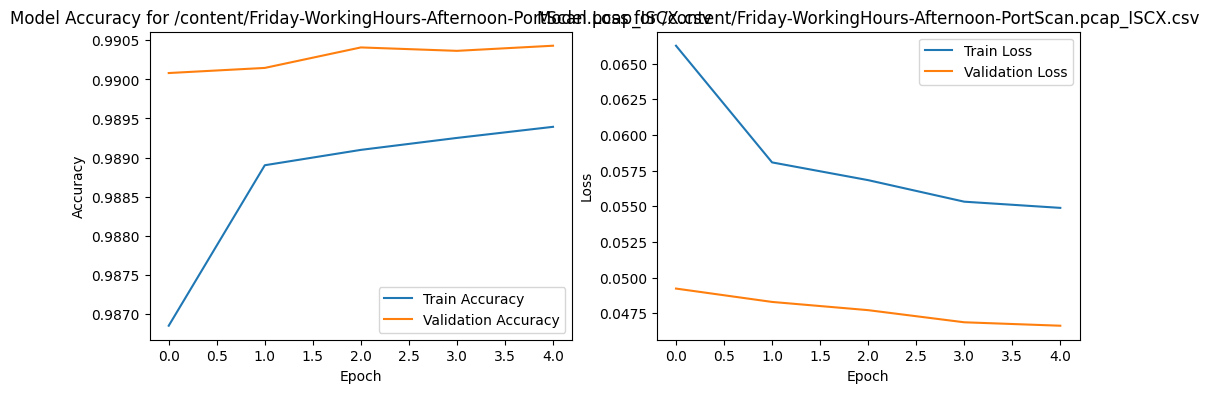

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3818/3818 ━━━━━━━━━━━━━━━━━━━━ 47s 12ms/step - accuracy: 0.9842 - loss: 0.0769 - val_accuracy: 0.9886 - val_loss: 0.0548
Epoch 2/5
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - accuracy: 0.9907 - loss: 0.0502 - val_accuracy: 0.9886 - val_loss: 0.0539
Epoch 3/5
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9901 - loss: 0.0527 - val_accuracy: 0.9886 - val_loss: 0.0526
Epoch 4/5
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.9897 - loss: 0.0523 - val_accuracy: 0.9886 - val_loss: 0.0520
Epoch 5/5
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - accuracy: 0.9899 - loss: 0.0510 - val_accuracy: 0.9888 - val_loss: 0.0511
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9902 - loss: 0.0466
Test Accuracy for /content/Friday-WorkingHours-Morning.pcap_ISCX.csv: 0.9902
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
Accuracy Percentage for /content/Friday-WorkingHours-Morning.pcap_ISCX.csv: 99.02%


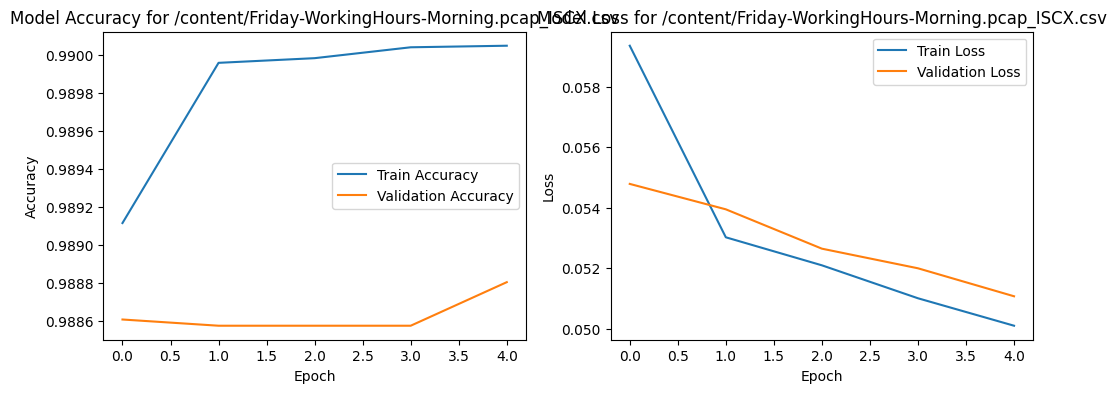

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
5064/5064 ━━━━━━━━━━━━━━━━━━━━ 66s 13ms/step - accuracy: 0.9938 - loss: 0.0216 - val_accuracy: 0.9999 - val_loss: 0.0010
Epoch 2/5
5064/5064 ━━━━━━━━━━━━━━━━━━━━ 86s 13ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 3/5
5064/5064 ━━━━━━━━━━━━━━━━━━━━ 63s 12ms/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.9999 - val_loss: 0.0010
Epoch 4/5
5064/5064 ━━━━━━━━━━━━━━━━━━━━ 81s 12ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.9999 - val_loss: 0.0010
Epoch 5/5
5064/5064 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9999 - val_loss: 0.0010
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9999 - loss: 7.0121e-04
Test Accuracy for /content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: 0.9999
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
Accuracy Percentage for /content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: 99.99%


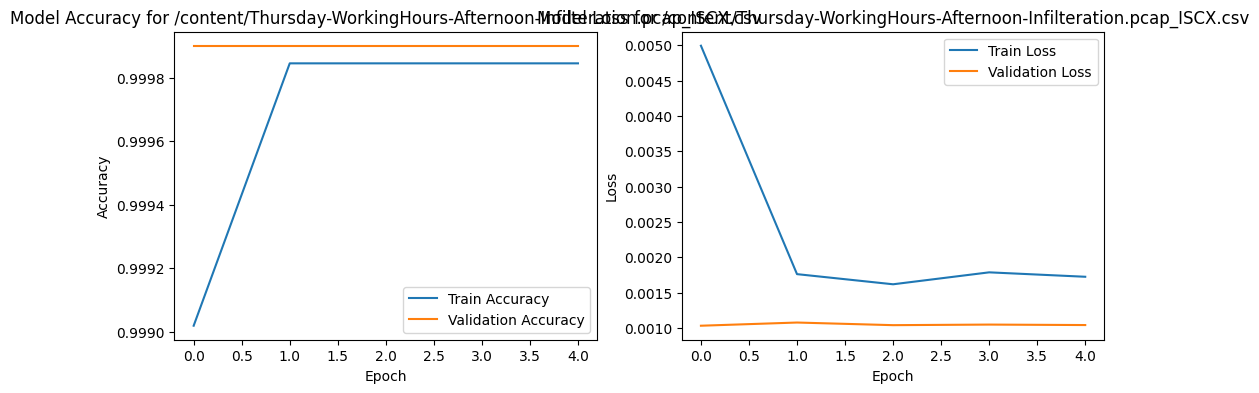

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1095/1095 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9627 - loss: 0.1616 - val_accuracy: 0.9763 - val_loss: 0.1017
Epoch 2/5
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9760 - loss: 0.1042 - val_accuracy: 0.9763 - val_loss: 0.0993
Epoch 3/5
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9769 - loss: 0.0995 - val_accuracy: 0.9763 - val_loss: 0.0998
Epoch 4/5
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9772 - loss: 0.0969 - val_accuracy: 0.9763 - val_loss: 0.0971
Epoch 5/5
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9773 - loss: 0.0966 - val_accuracy: 0.9763 - val_loss: 0.0975
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9786 - loss: 0.0844
Test Accuracy for /content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: 0.9785
343/343 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Accuracy Percentage for /content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: 97.85%


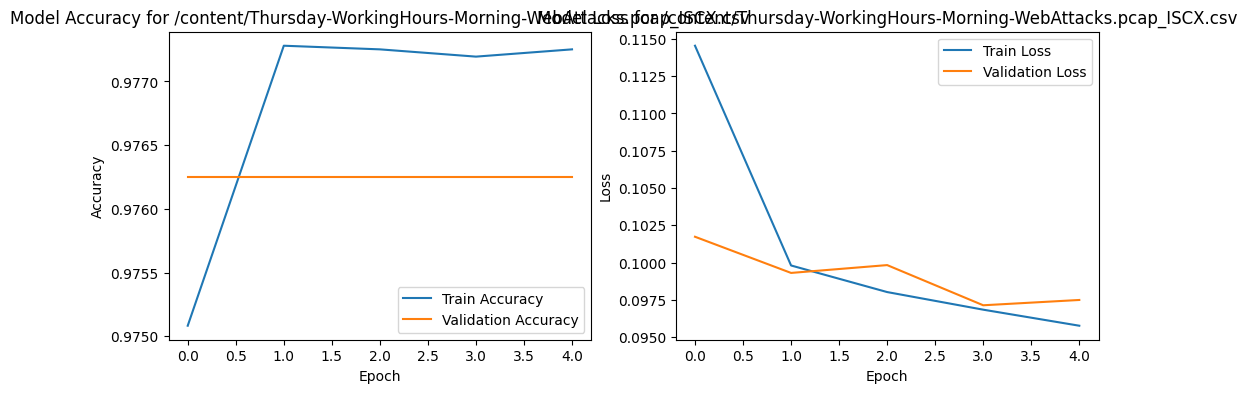

In [29]:
model = train_and_evaluate(file_paths)

In [30]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Saved models/trained_model.h5')

In [40]:
import os
import joblib

selected_features = [
    'Flow Duration',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Packet Length Mean',
    'Packet Length Std',
    'Total Fwd Packets',
    'Total Backward Packets',
    'SYN Flag Count',
    'FIN Flag Count',
    'RST Flag Count',
    'ACK Flag Count',
    'Average Packet Size'
]

# Collect features from all datasets for scaler fitting
all_features = []

# Iterate over datasets to extract feature columns
for file_path in file_paths:
    try:
        # Load dataset
        data = pd.read_csv(file_path)
        data.columns = data.columns.str.strip()  # Clean column names

        # Filter for selected features
        feature_columns = [col for col in selected_features if col in data.columns]

        # Ensure valid features are present before adding
        if feature_columns:
            feature_data = data[feature_columns]
            all_features.append(feature_data)
        else:
            print(f"Skipping dataset {file_path} as it does not contain valid features.")
    except Exception as e:
        print(f"Skipping dataset {file_path} due to error: {e}")

# Combine all valid feature data into a single DataFrame
if all_features:
    combined_features = pd.concat(all_features, ignore_index=True)
else:
    raise ValueError("No valid feature data found across datasets.")

# Replace infinite values and drop missing rows
combined_features.replace([np.inf, -np.inf], np.nan, inplace=True)
combined_features.dropna(inplace=True)

# Fit a single scaler on the combined data
scaler = StandardScaler()
scaler.fit(combined_features)

# Save the scaler as 'featurescaler.pkl'
save_dir = '/content/drive/MyDrive/Saved models'
os.makedirs(save_dir, exist_ok=True)
scaler_file = os.path.join(save_dir, 'featurescaler.pkl')
joblib.dump(scaler, scaler_file)

print(f"Single scaler saved successfully as '{scaler_file}'.")

Single scaler saved successfully as '/content/drive/MyDrive/Saved models/featurescaler.pkl'.


In [41]:
from sklearn.preprocessing import LabelEncoder

# Collect labels from all datasets
all_labels = []

# Iterate over datasets to extract the 'Label' column
for file_path in file_paths:
    try:
        # Load dataset
        data = pd.read_csv(file_path)
        data.columns = data.columns.str.strip()  # Clean column names

        # Check if 'Label' column exists
        if 'Label' in data.columns:
            # Add unique labels to the list
            all_labels.extend(data['Label'].unique())
        else:
            print(f"Skipping dataset {file_path} as it does not contain 'Label' column.")
    except Exception as e:
        print(f"Skipping dataset {file_path} due to error: {e}")

# Create a set of unique labels
unique_labels = list(set(all_labels))

# Fit a single label encoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(unique_labels)

# Save the label encoder as 'labelencoder.pkl'
encoder_file = os.path.join(save_dir, 'labelencoder.pkl')
joblib.dump(label_encoder, encoder_file)

print(f"Single label encoder saved successfully as '{encoder_file}'.")


Single label encoder saved successfully as '/content/drive/MyDrive/Saved models/labelencoder.pkl'.
